# Data Preprocessing

## Library Imports

In [14]:
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import librosa.display
from pathlib import Path
from glob import glob
import random
from tqdm import tqdm
from colorama import Fore, Style # to change color in formated string
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE



In [15]:
import numpy as np 
import pandas as pd 
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout ,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import librosa.display
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



## Data Imports

In [16]:
base_dir = 'audio/otherLang'
languages = os.listdir(base_dir)
print(languages)

['.ipynb_checkpoints', 'Bengali', 'Gujarati', 'Hindi', 'Kannada', 'Malayalam', 'Marathi', 'Punjabi', 'Tamil', 'Telugu', 'Urdu']


In [17]:
a = Path(base_dir)
print(a)

audio\otherLang


### Technique 1

In [18]:
# language = languages[1:]
# language

In [19]:
# for path in Path(base_dir).iterdir():
#     print(path)
#     if path.is_dir():
#       print(f"{path.name}: {len(list(path.glob('*')))}")

### Technique 2

In [20]:
language = []
for path in Path(base_dir).iterdir():
    print(path)
    if "." not in path.stem:
     language.append(path.stem)
print(language)

audio\otherLang\.ipynb_checkpoints
audio\otherLang\Bengali
audio\otherLang\Gujarati
audio\otherLang\Hindi
audio\otherLang\Kannada
audio\otherLang\Malayalam
audio\otherLang\Marathi
audio\otherLang\Punjabi
audio\otherLang\Tamil
audio\otherLang\Telugu
audio\otherLang\Urdu
['Bengali', 'Gujarati', 'Hindi', 'Kannada', 'Malayalam', 'Marathi', 'Punjabi', 'Tamil', 'Telugu', 'Urdu']


In [21]:
# for language in tqdm(languages):
#     language_dir = os.path.join(base_dir,language)
#     audio_files = glob(os.path.join(language_dir,"*.mp3"))
#     Tot = len(audio_files)
#     print(f"The {Fore.GREEN}{language}{Style.RESET_ALL} audio are in the path {Fore.BLUE}{language_dir}{Style.RESET_ALL} ")
#     print(f"The number audios in the {Fore.GREEN}{language}{Style.RESET_ALL} are {Fore.BLUE}{Tot}{Style.RESET_ALL}","\n")
#     random_audio_file = random.choice(audio_files)
#     ipd.display(ipd.Audio(random_audio_file))

In [22]:
# language_dir = os.path.join(base_dir, language[0])
# print(language_dir)
# audio_files = glob(os.path.join(language_dir, '*.mp3'))
# # print(audio_files)
# random_audio_file = random.choice(audio_files)
# print(f"{language[0]} as {len(audio_files)} in dataset" )
# ipd.display(ipd.Audio(random_audio_file))

In [23]:
for lang in language:
    language_dir = os.path.join(base_dir, lang)
    print(language_dir)
    audio_files = glob(os.path.join(language_dir, '*.mp3'))
    random_audio_file = random.choice(audio_files)
    print(f"{lang} as {len(audio_files)} in dataset" )
    ipd.display(ipd.Audio(random_audio_file))
print(len(audio_files))

audio/otherLang\Bengali
Bengali as 1000 in dataset


audio/otherLang\Gujarati
Gujarati as 1000 in dataset


audio/otherLang\Hindi
Hindi as 1000 in dataset


audio/otherLang\Kannada
Kannada as 1000 in dataset


audio/otherLang\Malayalam
Malayalam as 1000 in dataset


audio/otherLang\Marathi
Marathi as 1000 in dataset


audio/otherLang\Punjabi
Punjabi as 1000 in dataset


audio/otherLang\Tamil
Tamil as 1000 in dataset


audio/otherLang\Telugu
Telugu as 1000 in dataset


audio/otherLang\Urdu
Urdu as 1000 in dataset


1000


In [24]:
def feature_extract(File_name):
    features = []
    label = []
    for language in File_name:
        language_dir = os.path.join(base_dir,language)
        audio_files = glob(os.path.join(language_dir, '*.mp3'))
        for audio_file in tqdm(audio_files[:1000],desc=f"Processing {language}"):
                try:
                    audio, sample_rate = librosa.load(audio_file)
                    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                    mfccs_mean = np.mean(mfccs, axis=1)
                    features.append(mfccs_mean)
                    label.append(language)
                except Exception as e:
                    print(f"Error processing {audio_file}: {e}")
    df = pd.DataFrame({'Features': features, 'label': label})
    return df



in the above code i have passed audio_files instead of audio_fies.the problem here is the audio_files contain only urudu language because in the above cell after the completion of the loop the audio_file only contains urudu audio but it should contain all languages due to the vaiable name error inside the function (audio_files instead of audio_files) the accuracy is showing only for urudu language thats why the acc = 0.09

In [25]:
df=feature_extract(language)

Processing Urdu: 100%|█████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.32it/s]


cpu = 80-90
memory = 6.8/7.8

In [26]:
df

,Features,label
0,"[-354.43192, 94.88116, 2.4992244, 15.029386, -...",Bengali
1,"[-536.42584, 64.424706, 8.141434, 4.467196, 2....",Bengali
2,"[-336.07532, 99.34159, 18.566519, 51.96898, 28...",Bengali
3,"[-385.82617, 119.117035, 6.432657, -16.87068, ...",Bengali
4,"[-386.4121, 101.62929, 20.506752, 21.557932, 2...",Bengali
...,...,...
9995,"[-255.82338, 142.9651, 4.3535104, 29.041103, 1...",Urdu
9996,"[-280.07025, 124.34901, 10.577747, 13.72121, -...",Urdu
9997,"[-128.61023, 83.60243, 0.18816969, 29.030931, ...",Urdu
9998,"[-197.48, 55.16191, -21.33495, 40.296387, -18....",Urdu


## Exploratory Data Analysis

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Features  10000 non-null  object
 1   label     10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [28]:
# df.describe() 

In [29]:
df.shape,df.columns

((10000, 2), Index(['Features', 'label'], dtype='object'))

## Handling Missing Values

In [30]:
df.isnull().sum()

Features    0
label       0
dtype: int64

## Feature Engineering

### Technique 1 for Label encoding

In [31]:
# columns = df.label.unique()
# val = {}
# sum = 0
# for col in columns:
#     val[col] = sum
#     sum += 1

In [32]:
# val

In [33]:
#df.label = df["label"].map(val)

In [34]:
#df.label.unique()

### Tedhnique 2 for Label encoding

In [35]:
lb = LabelEncoder()

In [36]:
df['label'] = lb.fit_transform(df.label)

In [39]:
smote = SMOTE(sampling_strategy='not majority', random_state=42)

In [40]:
X=np.array(df['Features'].tolist())
y=np.array(df['label'].tolist())

In [41]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [43]:
print(Counter(y_resampled))

Counter({0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000})


In [44]:
df.head()

,Features,label
0,"[-354.43192, 94.88116, 2.4992244, 15.029386, -...",0
1,"[-536.42584, 64.424706, 8.141434, 4.467196, 2....",0
2,"[-336.07532, 99.34159, 18.566519, 51.96898, 28...",0
3,"[-385.82617, 119.117035, 6.432657, -16.87068, ...",0
4,"[-386.4121, 101.62929, 20.506752, 21.557932, 2...",0


# Model Building

## Train Test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,stratify=y_resampled)

num_classes = len(lb.classes_)
print(len(lb.classes_))
y_train_enc  = to_categorical(y_train, num_classes)
y_test_enc = to_categorical(y_test, num_classes)


10


## Model Initilization

In [63]:
model = Sequential()

## Model Training

In [64]:
model.add(Dense(256, input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))


model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

a = pd.Timestamp.now()
history = model.fit(X_train, y_train_enc, epochs=10, batch_size=32, validation_data=(X_test, y_test_enc))
b = pd.Timestamp.now()
print(b-a)

Epoch 1/10


C:\Users\bavit\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4824 - loss: 2.7724 - val_accuracy: 0.7100 - val_loss: 0.8723
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7553 - loss: 0.7075 - val_accuracy: 0.7745 - val_loss: 0.7074
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7970 - loss: 0.5398 - val_accuracy: 0.8085 - val_loss: 0.5011
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8199 - loss: 0.4435 - val_accuracy: 0.7995 - val_loss: 0.5251
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8391 - loss: 0.3983 - val_accuracy: 0.8135 - val_loss: 0.4376
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8479 - loss: 0.3617 - val_accuracy: 0.8350 - val_loss: 0.3569
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8591 - loss: 0.3222 - val_accuracy: 0.8085 - val_loss: 0.4960
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8605 - loss: 0.2961 - val_accuracy: 0.8305 - val_

In [56]:
pd.Timestamp.now()

Timestamp('2024-09-29 22:53:27.891172')

# Evaluation and Result

In [57]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_enc, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [58]:
# y_pred_classes,y_test_labels

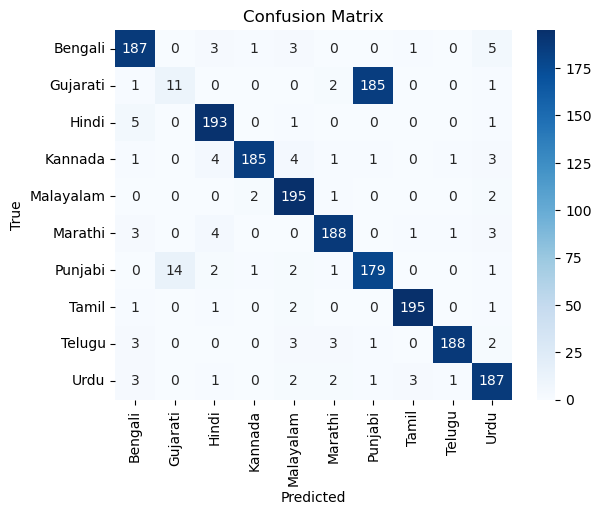

In [59]:
confusion_mtx = confusion_matrix(np.argmax(y_test_enc, axis=1), y_pred_classes)
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [60]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_enc)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.8584 - loss: 0.3229
Test Loss: 0.3482
Test Accuracy: 0.8540


In [61]:
print(classification_report(y_test_labels, y_pred_classes, target_names=lb.classes_))

              precision    recall  f1-score   support

     Bengali       0.92      0.94      0.93       200
    Gujarati       0.44      0.06      0.10       200
       Hindi       0.93      0.96      0.95       200
     Kannada       0.98      0.93      0.95       200
   Malayalam       0.92      0.97      0.95       200
     Marathi       0.95      0.94      0.94       200
     Punjabi       0.49      0.90      0.63       200
       Tamil       0.97      0.97      0.97       200
      Telugu       0.98      0.94      0.96       200
        Urdu       0.91      0.94      0.92       200

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.83      2000
weighted avg       0.85      0.85      0.83      2000



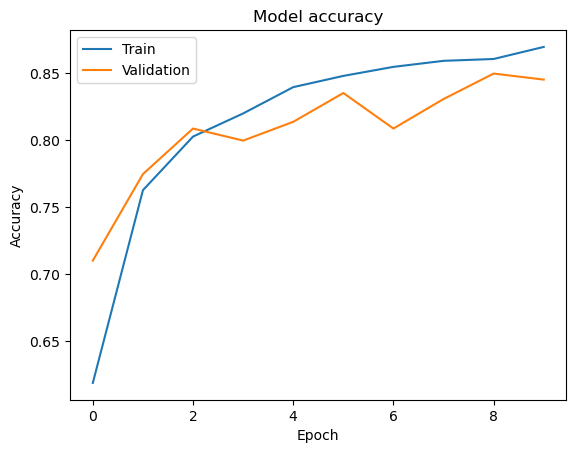

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()